In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['savefig.dpi'] = 600
matplotlib.rcParams['lines.linewidth'] = 3
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.linewidth"] = 2.0
plt.rcParams["axes.labelsize"] = 26

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [3]:
from scipy.integrate import odeint

In [25]:
from bokeh.io import output_notebook, curdoc, show
from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import CustomJS, ColumnDataSource, Slider
output_notebook()

Loading BokehJS ...

## Problem 1
consider reaction mechanism:

$A+B \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}}C$

$C  \stackrel{k_2}{\rightarrow}D $

We have the rates:

$\frac{d[A]}{dt}=-k_1 [A][B]+k_{-1}[C]$

$\frac{d[B]}{dt}=-k_1 [A][B]+k_{-1}[C]$

$\frac{d[C]}{dt}=k_1 [A][B]-k_{-1}[C]-k_2[C]$

$\frac{d[D]}{dt}=k_2[C]$


In [5]:
def rate1(Conc, t):
    A = Conc[0]
    B = Conc[1]
    C = Conc[2]
    D = Conc[3]
    k1 = ks[0]
    km1 = ks[1]
    k2 = ks[2]
    dAdt = -k1*A*B + km1*C
    dBdt = dAdt
    dCdt = - dAdt - k2*C
    dDdt = k2*C
    return [dAdt, dBdt, dCdt, dDdt]

In [6]:
t = np.linspace(0,20,1000)
Conc0 = [1.0, 1.0, 0., 0.]
ks = [20, 15, 2]
Conc_traj1 = odeint(rate1, Conc0, t)

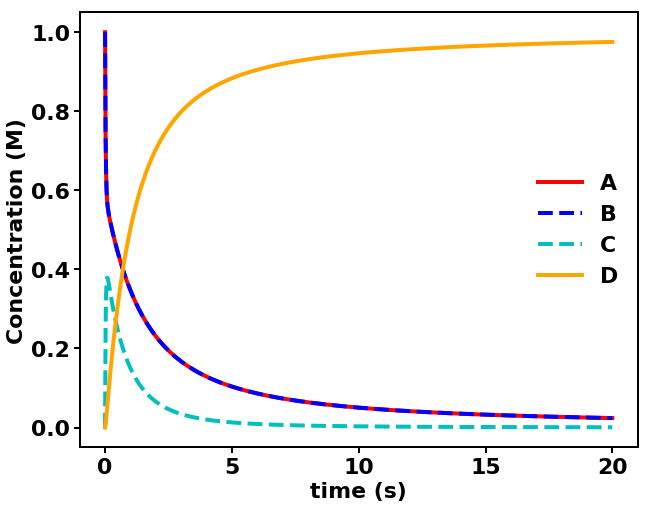

In [7]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(1,1,1)
plt.plot(t, Conc_traj1[:,0], 'r-', linewidth = 4, label='A')
plt.plot(t, Conc_traj1[:,1], 'b--', linewidth = 4, label='B')
plt.plot(t, Conc_traj1[:,2], 'c--', linewidth = 4, label='C')
plt.plot(t, Conc_traj1[:,3], 'orange', linewidth = 4, label='D')
plt.xlabel(r'time (s)',fontsize=22)
plt.ylabel(r'Concentration (M)',fontsize=22)
plt.legend(fontsize=22,frameon=False)
ax.tick_params(labelsize=22, length=6, width=2)
plt.show()
#plt.tight_layout()
#plt.savefig('plot1.eps', dpi=600)

In [33]:
'''
Use the "bokeh serve" command to run the python code saved to 
file named "kinetics-app.py" at your command prompt:
    bokeh serve kinetics-app.py
Then open the following URL to view the interactive plot (at Bokeh port 5006)
    http://localhost:5006/kinetics-app
in your browser.
'''

import numpy as np
from scipy.integrate import odeint
from bokeh.io import output_notebook, curdoc, show
from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import CustomJS, ColumnDataSource, Slider


# define reaction mechanisms
def rate1(var, t):
    A = var[0]
    B = var[1]
    C = var[2]
    D = var[3]
    k1 = var[4]
    km1 = var[5]
    k2 = var[6]
    dAdt = -k1*A*B + km1*C
    dBdt = dAdt
    dCdt = - dAdt - k2*C
    dDdt = k2*C
    #the last 3 variables are rate constants, dk/dt=0
    return [dAdt, dBdt, dCdt, dDdt, 0, 0, 0]



t = np.linspace(0,20,2000)
Conc0 = [1.0, 1.0, 0., 0.]
ks = [20, 15, 2]
var0 = Conc0 + ks
traj = odeint(rate1, var0, t)

source = ColumnDataSource(data={
    'x' : t,
    'ya' : traj[:,0],
    'yb' : traj[:,1],
    'yc' : traj[:,2],
    'yd' : traj[:,3],
})

p = figure(plot_width=700, plot_height=500,tools="pan,reset,save,wheel_zoom",)
p.line('x', 'ya', line_color='red',line_width=3, legend_label="A",source=source)
p.line('x', 'yb', line_color='blue', line_dash=[20,10] ,line_width=3,legend_label="B",source=source)
p.line('x', 'yc', line_color='cyan',line_width=3,legend_label="C",source=source)
p.line('x', 'yd', line_color='orange',line_width=3,legend_label="D",source=source)
p.xaxis.axis_label = "Time (s)"
p.yaxis.axis_label = "Concentration (M)"
p.xaxis.axis_label_text_font_size='16pt'
p.yaxis.axis_label_text_font_size='16pt'
p.yaxis.axis_label_text_font_size='16pt'
p.xaxis.major_label_text_font_size='12pt'
p.yaxis.major_label_text_font_size='12pt'
p.legend.location="center_right"
p.legend.label_text_font_size = "16pt"


# set up sliders
k1 = Slider(title="k1", value=20, start=0.0, end=40.0, step=0.5)
km1 = Slider(title="k-1", value=15, start=0.0, end=40.0, step=0.5)
k2 = Slider(title="k2", value=2, start=0.0, end=10.0, step=0.1)
A0 = Slider(title="[A]0", value=1, start=0.1, end=4.0, step=0.1)
B0 = Slider(title="[B]0", value=1, start=0.1, end=4.0, step=0.1)


# set up callbacks
def update_data(attrname, old, new):

    # Get the current slider values
    a1 = k1.value
    a2 = km1.value
    a3 = k2.value
    ca0 = A0.value
    cb0 = B0.value
    

    # Generate the new curve
    t = np.linspace(0,20,1000)
    Conc0 = [ca0, cb0, 0., 0.]
    ks = [a1, a2, a3]
    var0 = Conc0 + ks
    traj = odeint(rate1, var0, t)

    source.data = {
    'x' : t,
    'ya' : traj[:,0],
    'yb' : traj[:,1],
    'yc' : traj[:,2],
    'yd' : traj[:,3],
    }
    
# update plot whenever changes on sliders
for w in [k1,km1,k2,A0,B0]:
    w.on_change('value', update_data)
    

# Set up layouts and add to document
inputs = column(k1,km1,k2,A0,B0)
curdoc().add_root(row(inputs, p))





## Problem 2
consider reaction mechanism (enzyme reaction):

$A+B \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}}C$

$C  \stackrel{k_2}{\rightarrow} D+A$ 

We have the rates:

$\frac{d[A]}{dt}=-k_1 [A][B]+k_{-1}[C]+k_2[C]$

$\frac{d[B]}{dt}=-k_1 [A][B]+k_{-1}[C]$

$\frac{d[C]}{dt}=k_1 [A][B]-k_{-1}[C]-k_2[C]$

$\frac{d[D]}{dt}=k_2[C]$

In [27]:
def rate2(Conc, t):
    A = Conc[0]
    B = Conc[1]
    C = Conc[2]
    D = Conc[3]
    k1 = ks[0]
    km1 = ks[1]
    k2 = ks[2]
    dAdt = -k1*A*B + km1*C + k2*C
    dBdt = -k1*A*B + km1*C 
    dCdt = - dBdt - k2*C
    dDdt = k2*C
    return [dAdt, dBdt, dCdt, dDdt]

In [28]:
t = np.linspace(0,20,1000)
Conc0 = [1.0, 1.0, 0., 0.]
ks = [20, 15, 2]
Conc_traj2 = odeint(rate2, Conc0, t)

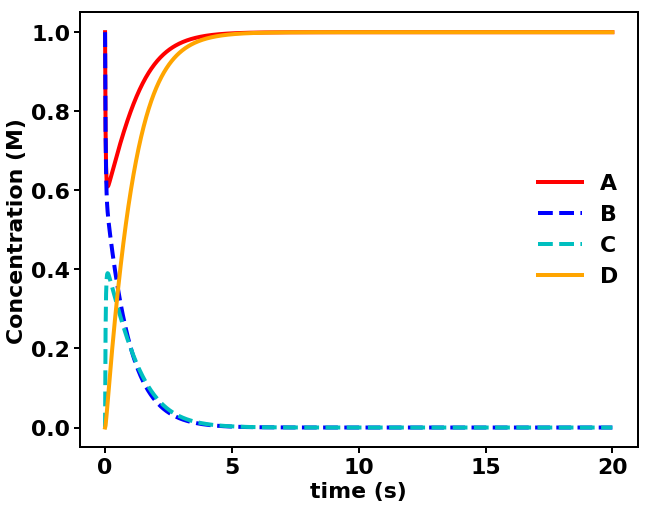

In [57]:
fig = plt.figure(1, figsize=(10, 8))
ax = plt.subplot(1,1,1)
plt.plot(t, Conc_traj2[:,0], 'r-', linewidth = 4, label='A')
plt.plot(t, Conc_traj2[:,1], 'b--', linewidth = 4, label='B')
plt.plot(t, Conc_traj2[:,2], 'c--', linewidth = 4, label='C')
plt.plot(t, Conc_traj2[:,3], 'orange', linewidth = 4, label='D')
plt.xlabel(r'time (s)',fontsize=22)
plt.ylabel(r'Concentration (M)',fontsize=22)
plt.legend(fontsize=22,frameon=False)
ax.tick_params(labelsize=22, length=6, width=2)
plt.show()
#plt.tight_layout()
#plt.savefig('plot2.eps', dpi=600)

In [ ]:
'''
Use the "bokeh serve" command to run the python code saved to 
file named "kinetics-app.py" at your command prompt:
    bokeh serve kinetics-app.py
Then open the following URL to view the interactive plot (at Bokeh port 5006)
    http://localhost:5006/kinetics-app
in your browser.
'''

import numpy as np
from scipy.integrate import odeint
from bokeh.io import output_notebook, curdoc, show
from bokeh.layouts import column, row
from bokeh.plotting import figure
from bokeh.models import CustomJS, ColumnDataSource, Slider


# define reaction mechanisms
def rate2(var, t):
    A = var[0]
    B = var[1]
    C = var[2]
    D = var[3]
    k1 = var[4]
    km1 = var[5]
    k2 = var[6]
    dAdt = -k1*A*B + km1*C + k2*C
    dBdt = -k1*A*B + km1*C 
    dCdt = - dBdt - k2*C
    dDdt = k2*C
    #the last 3 variables are rate constants, dk/dt=0
    return [dAdt, dBdt, dCdt, dDdt, 0, 0, 0]



t = np.linspace(0,20,2000)
Conc0 = [1.0, 1.0, 0., 0.]
ks = [20, 15, 2]
var0 = Conc0 + ks
traj = odeint(rate1, var0, t)

source = ColumnDataSource(data={
    'x' : t,
    'ya' : traj[:,0],
    'yb' : traj[:,1],
    'yc' : traj[:,2],
    'yd' : traj[:,3],
})

p = figure(plot_width=700, plot_height=500,tools="pan,reset,save,wheel_zoom",)
p.line('x', 'ya', line_color='red',line_width=3, legend_label="A",source=source)
p.line('x', 'yb', line_color='blue', line_dash=[20,10] ,line_width=3,legend_label="B",source=source)
p.line('x', 'yc', line_color='cyan',line_width=3,legend_label="C",source=source)
p.line('x', 'yd', line_color='orange',line_width=3,legend_label="D",source=source)
p.xaxis.axis_label = "Time (s)"
p.yaxis.axis_label = "Concentration (M)"
p.xaxis.axis_label_text_font_size='16pt'
p.yaxis.axis_label_text_font_size='16pt'
p.yaxis.axis_label_text_font_size='16pt'
p.xaxis.major_label_text_font_size='12pt'
p.yaxis.major_label_text_font_size='12pt'
p.legend.location="center_right"
p.legend.label_text_font_size = "16pt"


# set up sliders
k1 = Slider(title="k1", value=20, start=0.0, end=40.0, step=0.5)
km1 = Slider(title="k-1", value=15, start=0.0, end=40.0, step=0.5)
k2 = Slider(title="k2", value=2, start=0.0, end=10.0, step=0.1)
A0 = Slider(title="[A]0", value=1, start=0.1, end=4.0, step=0.1)
B0 = Slider(title="[B]0", value=1, start=0.1, end=4.0, step=0.1)


# set up callbacks
def update_data(attrname, old, new):

    # Get the current slider values
    a1 = k1.value
    a2 = km1.value
    a3 = k2.value
    ca0 = A0.value
    cb0 = B0.value
    

    # Generate the new curve
    t = np.linspace(0,20,1000)
    Conc0 = [ca0, cb0, 0., 0.]
    ks = [a1, a2, a3]
    var0 = Conc0 + ks
    traj = odeint(rate1, var0, t)

    source.data = {
    'x' : t,
    'ya' : traj[:,0],
    'yb' : traj[:,1],
    'yc' : traj[:,2],
    'yd' : traj[:,3],
    }
    
# update plot whenever changes on sliders
for w in [k1,km1,k2,A0,B0]:
    w.on_change('value', update_data)
    

# Set up layouts and add to document
inputs = column(k1,km1,k2,A0,B0)
curdoc().add_root(row(inputs, p))



